<a href="https://colab.research.google.com/github/gilesitorr/Estadistica_Avanzada/blob/main/Parcial_3/Tarea_1/EA_parcial3_tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Estadística Avanzada__
# Parcial 3 - Tarea 1
## _Gil Estéfano Rodríguez Rivera_

Todas las bases de datos utilizadas así como el desarrollo se encuentra en _GitHub_ en https://github.com/gilesitorr/Estadistica_Avanzada/tree/main/Parcial_3/Tarea_1

__Nota:__ En este Notebook se usó el kernel de R, aunque la extensión sea ipynb.

In [1]:
# Antes de comenzar, se importan las librerías a usar
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Biostatistics: A Foundation for Analysis in the Health Sciences
### Wayne W. Daniel & Chad L. Cross

### Ejemplo 13.8.2


__Table 13.8.3 shows the net book value of equipment capital per bed for a sample of hospitals from each of five types of hospitals. We wish to determine, by means of the Kruskal–Wallis test, if we can conclude that the average net book value of equipment capital per bed differs among the five types of hospitals. The ranks of the 41 values, along
with the sum of ranks for each sample, are shown in the table.__

In [4]:
# Se define el url donde está guardado el archivo csv a usar
url = "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_3/Tarea_1/EXA_C13_S08_02.csv"

# Se lee el archivo csv desde el url que se definió
df <- read.csv(url, header=TRUE)

In [5]:
# La base de datos correcta
df

A,B,C,D,E
<int>,<int>,<int>,<int>,<int>
1735,5260,2790,3475,6090
1520,4455,2400,3115,6000
1476,4480,2655,3050,5894
1688,4325,2500,3125,5705
1702,5075,2755,3275,6050
2667,5225,2592,3300,6150
1575,4613,2601,2730,5110
1602,4887,1648,NA,NA
1530,NA,1700,NA,NA


### Prueba de Bonferroni

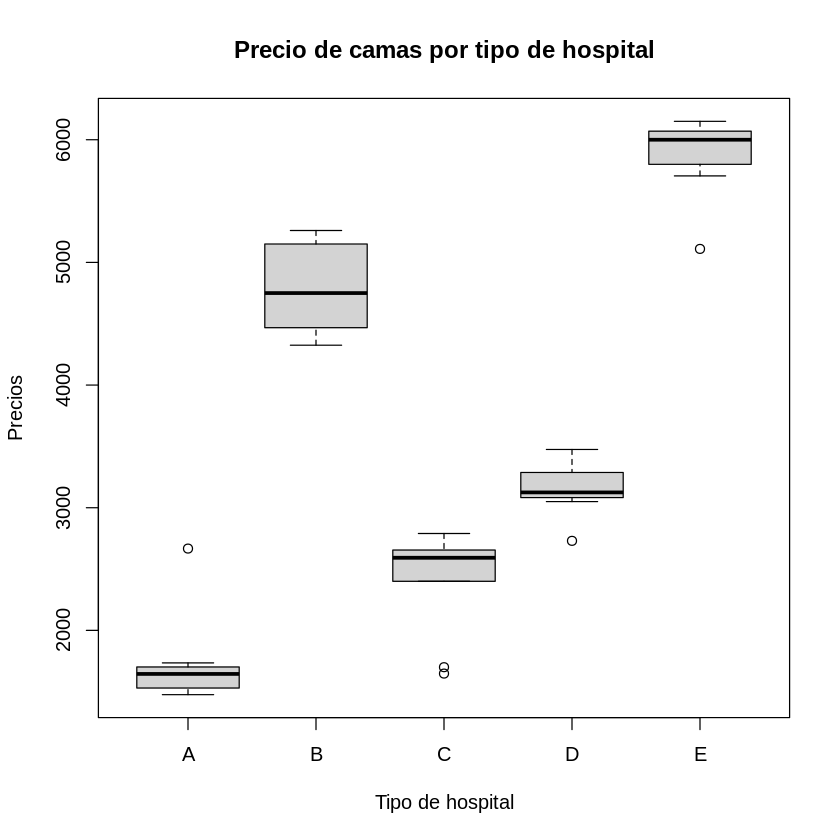

In [15]:
# Se realiza un boxplot para ilustrar la distribución
# entre grupos de la muestra
boxplot(df, main = "Precio de camas por tipo de hospital",
        xlab = "Tipo de hospital", ylab = "Precios", #col = "steelblue",
        border = "black")

In [98]:
# La tabla se separa en dos vectores
valor <- c()
tipo <- c()

for (i in 1:length(names(df))){
  for (j in 1:length(df[,i])){
    valor <- rbind(valor, df[j, i]) # Costos de cama
    tipo <- rbind(tipo, names(df)[i]) # Tipo de hospital
  }
}

In [99]:
# Se realiza una prueba t a pares con la correción de Bonferroni
pairwise.t.test(valor, tipo, p.adjust.method="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  valor and tipo 

  A       B       C       D      
B < 2e-16 -       -       -      
C 0.0019  7.6e-15 -       -      
D 1.2e-08 1.6e-09 0.0020  -      
E < 2e-16 1.5e-05 < 2e-16 3.0e-15

P value adjustment method: bonferroni 

### Prueba de Tukey

In [102]:
# Se construye un dataset con los vectores extraidos anteriormente
data <- data.frame("valor"=valor, "tipo"=tipo)


Call:
lm(formula = valor ~ tipo, data = data)

Coefficients:
(Intercept)        tipoB        tipoC        tipoD        tipoE  
     1719.3       3070.7        685.3       1433.6       4137.7  


In [107]:
# Se ajusta un modelo ANOVA
modelo <- aov(lm(valor~tipo, data=data))

In [106]:
# Se realiza la prueba HSD de Tukey para determinar la diferencia
# entre tipos de hospital
TukeyHSD(modelo, conf.level=.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lm(valor ~ tipo, data = data))

$tipo
          diff        lwr       upr     p adj
B-A  3070.7000  2582.6547  3558.745 0.0000000
C-A   685.2556   212.5133  1157.998 0.0016607
D-A  1433.5571   926.5147  1940.600 0.0000000
E-A  4137.7000  3630.6575  4644.742 0.0000000
C-B -2385.4444 -2885.3951 -1885.494 0.0000000
D-B -1637.1429 -2169.6440 -1104.642 0.0000000
E-B  1067.0000   534.4989  1599.501 0.0000142
D-C   748.3016   229.7898  1266.813 0.0017500
E-C  3452.4444  2933.9327  3970.956 0.0000000
E-D  2704.1429  2154.1781  3254.108 0.0000000


### Discusión

In [129]:
# La prueba de normalidad de la muestra
print(shapiro.test(data$valor))


	Shapiro-Wilk normality test

data:  data$valor
W = 0.89413, p-value = 0.001118



In [128]:
# La prueba de normalidad por grupo de la muestra
for (i in 1:length(colnames(df))){
  print(paste("Columna ",colnames(df)[i]))
  print(shapiro.test(df[,i]))
  print("")
  print("")
}

[1] "Columna  A"

	Shapiro-Wilk normality test

data:  df[, i]
W = 0.61265, p-value = 7.829e-05

[1] ""
[1] ""
[1] "Columna  B"

	Shapiro-Wilk normality test

data:  df[, i]
W = 0.90207, p-value = 0.3016

[1] ""
[1] ""
[1] "Columna  C"

	Shapiro-Wilk normality test

data:  df[, i]
W = 0.77711, p-value = 0.01116

[1] ""
[1] ""
[1] "Columna  D"

	Shapiro-Wilk normality test

data:  df[, i]
W = 0.95336, p-value = 0.7602

[1] ""
[1] ""
[1] "Columna  E"

	Shapiro-Wilk normality test

data:  df[, i]
W = 0.79315, p-value = 0.03503

[1] ""
[1] ""


En el libro, se concluye, por medio de la prueba de Kruskal–Wallis, que al menos una de los tipos de hospital tiene camas con un valor que difiere del promedio de todas los tipos de hospital (con un p-value menor a 0.005).

En este ejercicio se corrobora que sí hay una diferencia entre tipos de hospital. Esto es por medio de dos pruebas que comparan los tipos de hospital a pares. Con ese fin, se considerará una significancia del 0.005.

Primero se usaron pruebas-t pareadas usando la corrección de Bonferroni. En este caso, todas los tipos de hospital difieren entre sí, con p-values menores a la significancia.

El segundo método de comprobación se basó en la prueba HSD de Tukey, con la cual también se concluyó que los tipos de hospital difieren entre sí, con p-values menores a la significancia.

La diferencia entre ambos métodos no es muy relevaante en este caso, pero destaca la diferencia entre los pares A-C y C-D. Ambos pares tuvieron p-values menores en la segunda prueba que en la primera. Esto se puede deber a meras diferencias numéricas más que estadísticas.

Al final, con mucho margen, ambas pruebas corroboran los resultados de la prueba de Wallis. Como se mostró, la muestra completa sí cumple con la prueba de normalidad. Sin embargo, como también se mostró anteriormente, algunos grupos de la muestra no cumplen con la prueba de normalidad de Shapiro-Wilk.

Si hubiera que optar por algo, es preferible optar por la prueba que de Wallis, pues, sólo los hospitales de tipo A, C y B cumplen con la prueba de Shapiro. En todo caso, la validez de las pruebas pareadas entre esos grupos que cumplen con la normalidad, son válidas.

En conclusión, los resultados obtenidos por el libro han sido corroborados.